In [71]:
using Random, Statistics
using Plots
using LinearAlgebra

function makeDataSet(N, α, β, corr_location, rng)
    x = zeros(N)
    for i in 1:N
        if i == 1
            x[i] = randn(rng)
        else
            x[i] = α * x[i-1] + randn(rng)
        end
    end
    x[1] += β * x[corr_location]
    return x
end

# function makeDataSet(N, α, β, corr_location, rng)
#     x = zeros(N)
#     for i in N:-1:1  # Loop from N down to 1
#         if i == N
#             x[i] = randn(rng)
#         else
#             x[i] = α * x[i+1] + randn(rng)
#         end
#     end
#     x[N] += β * x[corr_location]
#     return x
# end

makeDataSet (generic function with 1 method)

In [103]:
α = -0.5
N = 20
β = -0.8

M = 300
dataSet1 = zeros(M, N)
seed = 12345
rng = MersenneTwister(seed)
for i in 1:M
    dataSet1[i, :] = makeDataSet(N, α, β, N, rng)
end



In [107]:
# Calculate xcorr
using Plots.Measures
std_devs = std(dataSet1, dims=1)
xcorr = zeros(N, N)
for i in 1:N
    for j in 1:N
        #xcorr[i, j] = sum(dataSet1[:, i] .* dataSet1[:, j]) / M / (std_devs[i] * std_devs[j])
        xcorr[i, j] = sum(dataSet1[:, i] .* dataSet1[:, j]) / M 
    end
end

avg = mean(dataSet1, dims=1)
outeravg = avg' * avg

xcorr_centered = xcorr .- outeravg

# min_val = minimum(xcorr_centered)
# max_val = maximum(xcorr_centered)
# xcorr_rescaled = 2 * ((xcorr_centered .- min_val) / (max_val - min_val)) .- 1

# Plot the rescaled, centered correlation heatmap
heatmap(xcorr_centered, 
    title="Class A Correlation Heatmap, \$\\alpha=$α\$, \$\\beta=$β\$", 
    color=cgrad([:red, :white, :blue]), 
    size = (1300, 800),
    xlabel = "Time Series Points",
    ylabel = "Time Series Points",
    colorbar=true, 
    colorbar_title="\nCorrelation",
    clim=(-1, 1),  # Ensuring the color map is scaled between -1 and 1
    colorbar_titlefontsize = 25,
    titlefontsize = 30,
    xlabelfontsize = 30,
    ylabelfontsize = 30,
    tickfontsize = 20,  # Font size for axis ticks
    right_margin = 18mm,  # Adjust right margin to fit the colorbar
    left_margin = 7mm,
    top_margin = 10mm,
    bottom_margin = 5mm,
    dpi = 750
)


#savefig("talk_class_B_heatmap.png")

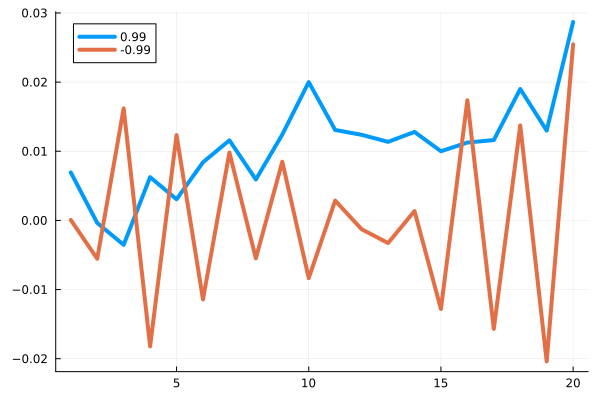

In [100]:
using Statistics
using DelimitedFiles
#α = 0.6
α_1 = 0.99
α_2 = -0.99
N = 20
β_1 = 0
β_2 = 0

corr_location = 2
# seed_1 = 12345
# seed_2 = 12354
seed_1 = 223
seed_2 = 163
rng_1 = MersenneTwister(seed_1)
rng_2 = MersenneTwister(seed_2)

M = 30000
dataset_1 = zeros(M, N)
dataset_2 = zeros(M, N)

for i in 1:M
    dataset_1[i, :] = makeDataSet(N, α_1, β_1, corr_location, rng_1)
end

for i in 1:M
    dataset_2[i, :] = makeDataSet(N, α_2, β_2, corr_location, rng_2)
end

# using Random, Statistics
# using Plots
# using LinearAlgebra

# function makeDataSet_what(N, α, β)
#     x = zeros(N)
#     for i in 1:N
#         if i == 1
#             x[i] = randn()
#         else
#             x[i] = α * x[i-1] + randn()
#         end
#     end
#     x[1] += β * x[2] + randn()
#     return x
# end

# α = 0.8
# N = 20
# β_1 = 0.8
# β_2 = -0.8

# M = 300
# dataset_1 = zeros(M, N)
# dataset_2 = zeros(M, N)

# for i in 1:M
#     dataset_1[i, :] = makeDataSet_what(N, α, β_1)
# end

# for i in 1:M
#     dataset_2[i, :] = makeDataSet_what(N, α, β_2)
# end

X_train = vcat(dataset_1[1:150, :], dataset_2[1:150, :])
X_test = vcat(dataset_1[151:300, :], dataset_2[151:300, :])
y_train = vcat(Int.(zeros(Int(M/2))), Int.(ones(Int(M/2))))
y_test = vcat(Int.(zeros(Int(M/2))), Int.(ones(Int(M/2))))

#writedlm("sahand_train_alpha=1_betas_pm08_1-2.csv", X_train, ",")
#writedlm("sahand_train_alpha=1_betas_pm08_labels.csv", y_train, ",")
#writedlm("sahand_test_alpha=1_betas_pm08_1-2.csv", X_test, ",")
#writedlm("sahand_test_alpha=1_betas_pm08_labels.csv", y_test, ",")

# writedlm("whatisgoingon_train.csv", X_train, ',')
# writedlm("whatisgoingon_test.csv", X_test, ',')
# writedlm("whatisgoingon_train_labels.csv", y_train, ',')
# writedlm("whatisgoingon_test_labels.csv", y_test, ',')

plot(vec(mean(dataset_1, dims = 1)), lw = 4, label = "0.99")
plot!(vec(mean(dataset_2, dims = 1)), lw = 4, label = "-0.99")

# plot(dataset_1[2, :], label = "+")
# plot!(dataset_2[2, :], label = "-")

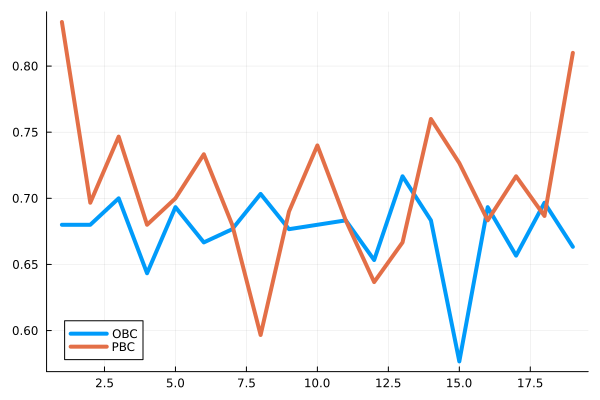

In [8]:
using Plots
using Plots.Measures
using DelimitedFiles

train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alphapm08.csv", ',')
test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alphapm08.csv", ',')
train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alphapm08.csv", ',')
test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alphapm08.csv", ',')

# train_accs_OBC_beta0 = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alphapm08_beta0.csv", ',')
# test_accs_OBC_beta0 = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alphapm08_beta0.csv", ',')
# train_accs_PBC_beta0 = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alphapm08_beta0.csv", ',')
#test_accs_PBC_beta0 = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alphapm08_beta0.csv", ',')

betas = 0.1:0.1:2
corr_locs = 2:20

plot(test_accs_OBC[8, :], lw = 4, label = "OBC")
plot!(test_accs_PBC[8, :], lw = 4, label = "PBC")

# p = heatmap(corr_locs, betas, train_accs_OBC,
#             xlabel = "Correlation Location (Second Site)",
#             ylabel= "\$|\\beta|\$",
#             title = "OBC Training Accuracy",
#             color = :coolwarm,
#             clim = (0, 1),
#             colorbar_title = "Accuracy")
# display(p)

# p = heatmap(corr_locs, betas, train_accs_PBC,
#             xlabel = "Correlation Location (Second Site)",
#             ylabel= "\$|\\beta|\$",
#             title = "PBC Training Accuracy",
#             color = :coolwarm,
#             clim = (0, 1),
#             colorbar_title = "Accuracy")
# display(p)

# p = heatmap(corr_locs, betas, test_accs_OBC,
#             xlabel = "Correlation Location (Second Site)",
#             ylabel= "\$|\\beta|\$",
#             title = "OBC Testing Accuracy",
#             color = :coolwarm,
#             clim = (0, 1),
#             colorbar_title = "Accuracy")
# display(p)

# p = heatmap(corr_locs, betas, test_accs_PBC,
#             xlabel = "Correlation Location (Second Site)",
#             ylabel= "\$|\\beta|\$",
#             title = "PBC Testing Accuracy",
#             color = :coolwarm,
#             clim = (minimum(test_accs_PBC), 1),
#             colorbar_title = "Accuracy")
# display(p)

# @show test_accs_PBC[8, :]

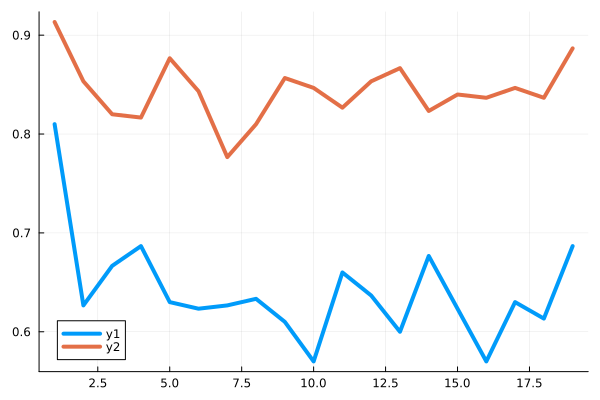

In [70]:
using Plots
using DelimitedFiles
using Plots.Measures

# train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alpha08_chi3_eta02.csv", ',')
# test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alpha08_chi3_eta02.csv", ',')
# train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alpha08_chi3_eta02.csv", ',')
# test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alpha08_chi3_eta02.csv", ',')

train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alphapm04_chi3_eta03.csv", ',')
test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alphapm04_chi3_eta03.csv", ',')
train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alphapm04_chi3_eta03.csv", ',')
test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alphapm04_chi3_eta03.csv", ',')

# train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alphapm05_chi3_eta03.csv", ',')
# test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alphapm05_chi3_eta03.csv", ',')
# train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alphapm05_chi3_eta03.csv", ',')
# test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alphapm05_chi3_eta03.csv", ',')

# corr_locs = 2:20
# betas = 0.1:0.1:2

# # Create the heatmap
# p = heatmap(
#     corr_locs, betas, test_accs_PBC,
#     c = :viridis,  # Color scale
#     title = "Test Accuracy Heatmap, PBC \n \$\\alpha_{1},\\alpha_{2}=\\pm0.4\$, \$\\beta_{1}=-\\beta_{2}\$, \$\\chi_{max}=3\$",  # Title with two lines
#     xlabel = "Correlation Locations",
#     ylabel = "\$|\\beta|\$",
#     size = (1300, 800),  # Adjust the size of the plot
#     clims = (minimum(test_accs_OBC), maximum(test_accs_PBC)),  # Set color limits from OBC and PBC data
#     colorbar_title = " \nAccuracy",
#     colorbar_titlefontsize = 25,
#     titlefontsize = 30,
#     xlabelfontsize = 25,
#     ylabelfontsize = 30,
#     #guidefontsize = 16,  # Font size for axis titles
#     tickfontsize = 20,  # Font size for axis ticks
#     right_margin = 18mm,  # Adjust right margin to fit the colorbar
#     left_margin = 7mm,
#     top_margin = 10mm,
#     bottom_margin = 5mm,
#     dpi = 750
# )
#/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/LogLoss/test_PBC_stoud_vary_beta_corr_alpha08_chi2_eta02_heatmap.png
#savefig(p, "test_PBC_stoud_vary_beta_corr_alphapm04_chi3_eta03_heatmap.png")

plot(test_accs_OBC[20, :], lw = 4)
plot!(test_accs_PBC[20, :], lw = 4)

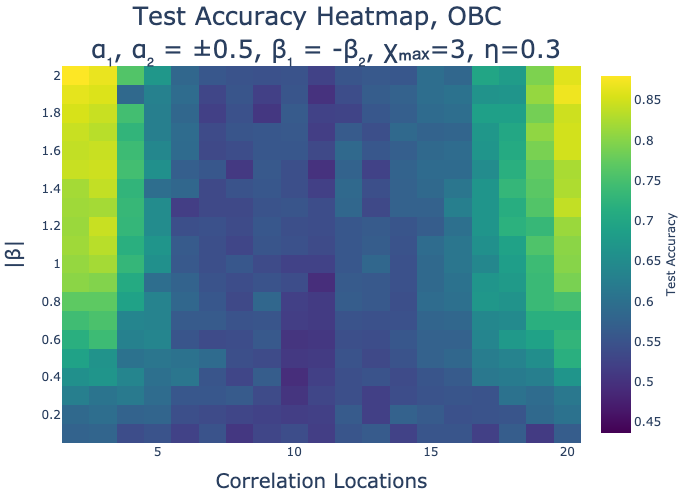

In [3]:
using PlotlyJS
using DelimitedFiles
using MathJaxRenderer

# train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alphapm08.csv", ',')
# test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alphapm08.csv", ',')
# train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alphapm08.csv", ',')
# test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alphapm08.csv", ',')

# train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alpha08.csv", ',')
# test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alpha08.csv", ',')
# train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alpha08.csv", ',')
# test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alpha08.csv", ',')

# train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alphapm05.csv", ',')
# test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alphapm05.csv", ',')
# train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alphapm05.csv", ',')
# test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alphapm05.csv", ',')

# train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alphapm06_chi3.csv", ',')
# test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alphapm06_chi3.csv", ',')
# train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alphapm06_chi3.csv", ',')
# test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alphapm06_chi3.csv", ',')

# train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alphapm05_chi3_eta03.csv", ',')
# test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alphapm05_chi3_eta03.csv", ',')
# train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alphapm05_chi3_eta03.csv", ',')
# test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alphapm05_chi3_eta03.csv", ',')

train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_OBC_stoud_vary_beta_corr_alpha08_chi3_eta02.csv", ',')
test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_OBC_stoud_vary_beta_corr_alpha08_chi3_eta02.csv", ',')
train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/train_PBC_stoud_vary_beta_corr_alpha08_chi3_eta02.csv", ',')
test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/test_PBC_stoud_vary_beta_corr_alpha08_chi3_eta02.csv", ',')

corr_locs = 2:20
betas = 0.1:0.1:2
#±
fig = plot(
    heatmap(
        x=corr_locs,
        y=betas,
        z=test_accs_PBC,
        coloraxis="coloraxis"
    ),
    Layout(
        title=attr(
            #text="Test Accuracy Heatmap, OBC <br> α₁, α₂ = ±0.5, β₁ = -β₂, χₘₐₓ=3",  # Two-line title
            text="Test Accuracy Heatmap, OBC <br> α₁, α₂ = 0.8, β₁ = -β₂, χₘₐₓ=3",  # Two-line title
            font=attr(size=25),  # Font size for the title
            xref="paper",  # Referencing the paper space (entire layout)
            x=0.5,  # Center the title
            xanchor="center",
            y=0.95,  # Adjust vertical position of the title
            yanchor="top",
            pad=attr(b=20)  # Add padding below the title
        ),
        margin=attr(t=66),  # Add top margin to avoid overlapping
        xaxis=attr(
            title="Correlation Locations",
            titlefont=attr(size=20),
            side="bottom"
        ),
        yaxis=attr(
            title="|β|",
            titlefont=attr(size=20)
        ),
        coloraxis=attr(
            cmin=minimum(test_accs_OBC),
            cmax=maximum(test_accs_PBC),
            colorscale="Viridis",
            colorbar=attr(
                title=attr(
                    text="Test Accuracy",
                    side="right"
                ),
                titlefont=attr(size=20)
            )
        )
    )
)

# Display the plot
display(fig)

#savefig(fig, "test_PBC_stoud_vary_beta_corr_alphapm05_chi3_eta03_heatmap.png", format="png", scale=11)

# trace1 = scatter(;x=corr_locs, y=test_accs_OBC[20, :], mode="lines+markers", name="OBC - β₁,β₂=(+/-) 2")
# trace2 = scatter(;x=corr_locs, y=test_accs_PBC[20, :], mode="lines+markers", name="PBC - β₁,β₂=(+/-) 2")
# trace3 = scatter(;x=corr_locs, y=test_accs_OBC[1, :], mode="lines+markers", name="OBC - β₁,β₂=(+/-) 0.1")
# trace4 = scatter(;x=corr_locs, y=test_accs_PBC[1, :], mode="lines+markers", name="PBC - β₁,β₂=(+/-) 0.1")

# layout = Layout(
#     title="OBC Testing Accuracy vs PBC Testing Accuracy<br><sub>Stoudenmire, α₁,α₂=(+/-) 0.5, β₁,β₂=(+/-) 2 vs β₁,β₂=(+/-) 0.1, chi_max=3, eta=0.3</sub>",
#     titlefont=attr(size=20),  # Font size for the title
#     xaxis=attr(
#         title="Correlation Location (of Second Site)",  # LaTeX in title
#         titlefont=attr(size=16)
#     ),
#     yaxis=attr(
#         title="Accuracy",  # LaTeX in title
#         titlefont=attr(size=16)
#     ),
#     margin=attr(t=100)  # Increase top margin to avoid overlap with title
# )

# myplot = plot([trace1, trace2, trace3, trace4], layout)

# savefig(myplot, "OBC_vs_PBC_alphapm05_betapm2_vs_betapm01_chi3_eta03.png", format = "png", scale = 11)

In [11]:
using DelimitedFiles
# arrow_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/arrow_leg_sweeps20_chi16_eta02_OBC_test.csv", ',')
# arrow_PBC_left = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/arrow_leg_sweeps20_chi16_eta02_PBC_left_test.csv", ',')
# arrow_PBC_right = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/arrow_leg_sweeps20_chi16_eta02_PBC_right_test.csv", ',')
# arrow_PBC_both = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/arrow_leg_sweeps20_chi16_eta02_PBC_both_test.csv", ',')
# arrow_PBC_both_two = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/arrow_leg_sweeps20_chi16_eta02_PBC_both_two_test.csv", ',')
# arrow_PBC_random = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/arrow_leg_sweeps20_chi16_eta02_PBC_random_test.csv", ',')

# plot(arrow_OBC[:, 1], lw = 4, label = "OBC", dpi = 700)
# plot!(arrow_PBC_left[:, 1], lw = 4, label = "PBC Left")
# plot!(arrow_PBC_right[:, 1], lw = 4, label = "PBC Right")
# plot!(arrow_PBC_both[:, 1], lw = 4, label = "PBC Both")
# #plot!(arrow_PBC_both_two[:, 1], lw = 4, label = "PBC Both Two")
# plot!(arrow_PBC_random[:, 1], lw = 4, label = "PBC Random")
# xlabel!("Sweeps", fontsize = 20)
# ylabel!("Accuracy", fontsize = 20)
# title!("Comparsison of Algorithms for ArrowHead Data \n \$\\chi_{max}=16\$, \$\\eta=0.2\$, \$d=4\$, Legendre Encoding")
# savefig("arrowhead_testing_comparisons_leg_sweeps20_chi16_eta02.png")

swedish_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/swedish_leg_sweeps20_chi16_eta02_OBC_test.csv", ',')
swedish_PBC_left = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/swedish_leg_sweeps20_chi16_eta02_PBC_left_test.csv", ',')
swedish_PBC_right = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/swedish_leg_sweeps20_chi16_eta02_PBC_right_test.csv", ',')
swedish_PBC_both = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/swedish_leg_sweeps20_chi16_eta02_PBC_both_test.csv", ',')
swedish_PBC_both_two = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/swedish_leg_sweeps20_chi16_eta02_PBC_both_two_test.csv", ',')
swedish_PBC_random = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/swedish_leg_sweeps20_chi16_eta02_PBC_random_test.csv", ',')

plot(swedish_OBC[:, 1], lw = 4, label = "OBC", dpi = 700)
plot!(swedish_PBC_left[:, 1], lw = 4, label = "PBC Left")
plot!(swedish_PBC_right[:, 1], lw = 4, label = "PBC Right")
plot!(swedish_PBC_both[:, 1], lw = 4, label = "PBC Both")
#plot!(swedish_PBC_both_two[:, 1], lw = 4, label = "PBC Both Two")
plot!(swedish_PBC_random[:, 1], lw = 4, label = "PBC Random")
xlabel!("Sweeps", fontsize = 20)
ylabel!("Accuracy", fontsize = 20)
title!("Comparsison of Algorithms for Swedish Leaf Data \n \$\\chi_{max}=16\$, \$\\eta=0.2\$, \$d=4\$, Legendre Encoding")
savefig("swedish_testing_comparisons_leg_sweeps20_chi16_eta02.png")

"/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/LogLoss/swedish_testing_comparisons_leg_sweeps20_chi16_eta02.png"

In [4]:
using Plots

# Parameters
m = 1.0 
C1_values = -5:3:27
C2_values = 1:2:13
r_min = 0.0
r_max = 5.0
epsilon = 1e-5 # Small tolerance to avoid singularity at r = 2m
r = vcat(collect(0.01:0.1:(2*m - epsilon)), collect((2*m + epsilon):0.1:r_max))

plot()
for C in C2_values
    t_1 = C .- r
    plot!(r, t_1, lw=2, label = "", color=:black, xaxis=false, yaxis = false, dpi=700)
    ylims!(0, 10)
    xlims!(0, 5)
end
for C in C1_values
    t_2 = C .+ r .+ 4*m*log.(abs.(r./(2*m) .- 1))
    plot!(r, t_2, label="", lw=2, color=:black)
end


vline!([2*m], label = "Horizon at r=2m", lw = 2, color=:red)
hline!([0], label = "", lw = 2, color=:black)
vline!([0], label = "", lw = 2, color = :black)
vline!([0], label = "", lw = 2, color=:black)
title!("\$(r, \\tilde{t})\$ Spacetime Diagram", titlefontsize = 20)
annotate!(0, 10.5, text("\$\\tilde{t}\$", :black, 20))
annotate!(5, -0.5, text("\$r\$", :black, 20))

savefig("GR2_Q1_c.png")


"/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/LogLoss/GR2_Q1_c.png"

In [5]:
using Plots

# Parameters
m = 1.0 
C1_values = -3:2:9 
C2_values = -2:2:12
r_min = 0.0
r_max = 5.0 
epsilon = 1e-5  # Small tolerance to avoid singularity at r = 2m
r = vcat(collect(0.01:0.1:(2*m - epsilon)), collect((2*m + epsilon):0.1:r_max))

plot()
for C in C2_values
    t_1 = C .- r .- 2*m*log.(abs.(r./(2*m) .- 1))
    plot!(r, t_1, lw=2, label = "", color=:black, xaxis=false, yaxis = false, dpi = 700)
    ylims!(0, 10)
    xlims!(0, 5)
end
for C in C1_values
    t_2 = C .+ r .+ 2*m*log.(abs.(r./(2*m) .- 1))
    plot!(r, t_2, label="", lw=2, color=:black)
end


vline!([2*m], label = "Horizon at r=2m", lw = 2, color=:red)
hline!([0], label = "", lw = 2, color=:black)
vline!([0], label = "", lw = 2, color = :black)
vline!([0], label = "", lw = 2, color=:black)
title!("\$(r, t)\$ Spacetime Diagram", titlefontsize = 20)
annotate!(0, 10.5, text("\$t\$", :black, 20))
annotate!(5, -0.5, text("\$r\$", :black, 20))

savefig("GR2_Q1_d.png")

"/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/LogLoss/GR2_Q1_d.png"

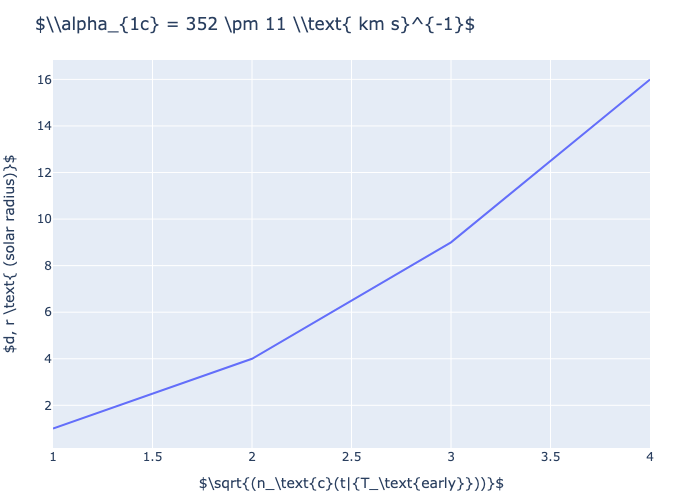

In [11]:
using PlotlyJS, LaTeXStrings, MathJaxRenderer

trace1 = scatter(
    x=[1, 2, 3, 4],
    y=[1, 4, 9, 16],
    mode="lines",
)

plot(trace1, Layout(
    xaxis_title=L"$\sqrt{(n_\text{c}(t|{T_\text{early}}))}$",
    yaxis_title=L"$d, r \text{ (solar radius)}$",
    title= L"\\alpha_{1c} = 352 \pm 11 \\text{ km s}^{-1}"
))

In [49]:
using Plots
using Plots.Measures
#import Pkg
#Pkg.add("CairoMaike")
#using CairoMakie
using DelimitedFiles

# function plot_time_series(class1_data, class2_data)
#     n_plots = 10  # Number of plots per row
    
#     # Create a 2x10 grid of subplots
#     plot_layout = @layout([grid(1, n_plots); grid(1, n_plots)])
    
#     # Initialize a plot object with the layout
#     p = plot(
#         layout = plot_layout, 
#         size = (7000, 1500),
#         left_margin = 10mm,  # Adds margin to the left-hand side
#         bottom_margin = 10mm,  # Adds margin at the bottom
#         plot_spacing = 10mm  # Adds spacing between rows
#     )
    
#     # Plot the first 10 time series from class1_data (first row of plots)
#     for i in 1:n_plots
#         plot!(p, class1_data[i, :], title="Class 1, Series $i", label="", subplot=i)
#     end
    
#     # Plot the first 10 time series from class2_data (second row of plots)
#     for i in 1:n_plots
#         plot!(p, class2_data[i, :], title="Class 2, Series $i", label="", subplot=n_plots + i)
#     end
    
#     # Display the combined plot
#     display(p)
# end

# function plot_time_series(class1_data, class2_data)
#     n_plots = 5
#     #resolution = 1000.0
#     fig = Figure(size = (1500, 500))
    
#     for i in 1:n_plots
#         ax1 = Axis(fig[1, i], title="Class 1, Series $i", ylabel = "y", xlabel = "x") #titlesize = 40, xlabelsize = 50, ylabelsize = 50)
#         lines!(ax1, class1_data[i, :])
        
#         ax2 = Axis(fig[2, i], title="Class 2, Series $i", ylabel = "y", xlabel = "x") #titlesize = 40, xlabelsize = 50, ylabelsize = 50)
#         lines!(ax2, class2_data[i, :])
#     end
#     #resize!(fig.scene, resolution)
#     display(fig)
#     #savefig("tfff.png")
#     save("tfff_4.png", fig, px_per_unit=20)
# end
# plot_time_series(X_train[1:5, :], X_train[151:155, :])

train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/change_corr_stoud_train_acc_OBC_alpha00_betapm5.csv", ',')
test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/change_corr_stoud_test_acc_OBC_alpha00_betapm5.csv", ',')
train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/change_corr_stoud_train_acc_PBC_alpha00_betapm5.csv", ',')
test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/change_corr_stoud_test_acc_PBC_alpha00_betapm5.csv", ',')

# x = 2:20
# fig = Figure()
# ax = Axis(fig[1, 1], title = "Two Vectors on the Same Plot", xlabel = "X", ylabel = "Y")
# lines!(ax, x, train_accs_OBC[:, 1], color = :blue, label = "Vector 1")
# lines!(ax, x, train_accs_PBC[:, 1], color = :red, label = "Vector 2")
# axislegend(ax)

# display(fig)
x = 2:20
plot(x, train_accs_OBC[:, 1], lw = 4, label = "OBC", legend = :top, legendfontsize = 8, dpi = 750)
plot!(x, train_accs_PBC[:, 1], lw = 4, label = "PBC")
xlabel!("Correlation Location (of Second Correlation Site)", fontsize = 20)
ylabel!("Accuracy", fontsize = 20)
title!("Training Accuracy vs Correlation Location\n \$\\alpha_{1,2}=0\$, \$\\beta_{1,2}=\\pm5\$", titlefontsize = 16)
savefig("change_corr_stoud_chi2_train_alpha00_betapm5.png")

plot(x, test_accs_OBC[:, 1], lw = 4, label = "OBC", legend = :top, legendfontsize = 8, dpi = 750)
plot!(x, test_accs_PBC[:, 1], lw = 4, label = "PBC")
xlabel!("Correlation Location (of Second Correlation Site)", fontsize = 20)
ylabel!("Accuracy", fontsize = 20)
title!("Testing Accuracy vs Correlation Location\n \$\\alpha_{1,2}=0\$, \$\\beta_{1,2}=\\pm5\$", titlefontsize = 16)
savefig("change_corr_stoud_chi2_test_alpha00_betapm5.png")


"/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/LogLoss/change_corr_stoud_chi2_test_alpha00_betapm5.png"

In [43]:
train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/change_chi_stoud_train_acc_OBC_alpha0901_beta00.csv", ',')
test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/change_chi_stoud_test_acc_OBC_alpha0901_beta00.csv", ',')
train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/change_chi_stoud_train_acc_PBC_alpha0901_beta00.csv", ',')
test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/change_chi_stoud_test_acc_PBC_alpha0901_beta00.csv", ',')

x = 2:20
plot(x, train_accs_OBC[:, 1], lw = 4, label = "OBC", legendfontsize = 8, dpi = 750)
plot!(x, train_accs_PBC[:, 1], lw = 4, label = "PBC")
xlabel!("\$\\chi_{max}\$", fontsize = 20)
ylabel!("Accuracy", fontsize = 20)
title!("Training Accuracy vs \$\\chi_{max}\$, \$\\alpha_{1,2}=0.9, 0.1\$, \$\\beta_{1,2}=0\$", titlefontsize = 16)
savefig("change_chi_stoud_train_alpha0901_beta00.png")

plot(x, test_accs_OBC[:, 1], lw = 4, label = "OBC", legendfontsize = 8, dpi = 750)
plot!(x, test_accs_PBC[:, 1], lw = 4, label = "PBC")
xlabel!("\$\\chi_{max}\$", fontsize = 20)
ylabel!("Accuracy", fontsize = 20)
title!("Testing Accuracy vs \$\\chi_{max}\$, \$\\alpha_{1,2}=0.9, 0.1\$, \$\\beta_{1,2}=0\$", titlefontsize = 16)
savefig("change_chi_stoud_test_alpha0901_beta00.png")

"/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/LogLoss/change_chi_stoud_test_alpha0901_beta00.png"

In [24]:
xcorr = zeros(N, N)
for i in 1:N
    for j in 1:N
        xcorr[i, j] = sum(dataSet2[:, i] .* dataSet2[:, j]) / M
    end
end

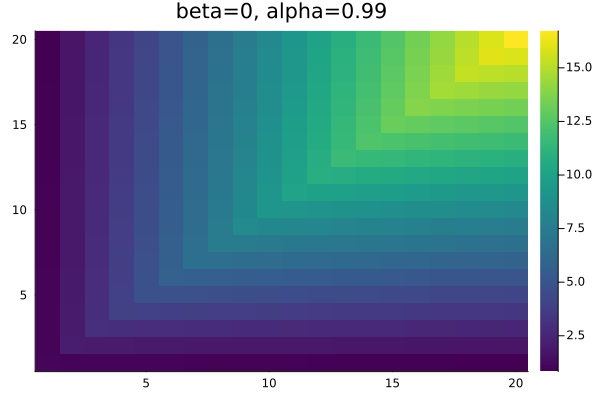

In [95]:
xcorr_1 = zeros(N, N)
for i in 1:N
    for j in 1:N
        xcorr_1[i, j] = sum(dataset_1[:, i] .* dataset_1[:, j]) / M
    end
end
avg_1 = mean(dataset_1, dims=1)
outeravg_1 = avg_1' * avg_1

# Plotting the heatmap with color bar for the second dataset
heatmap(xcorr_1 .- outeravg_1, title="beta=$(β_1), alpha=$(α_1)", color=:viridis, colorbar=true)
#savefig("beta08.png")

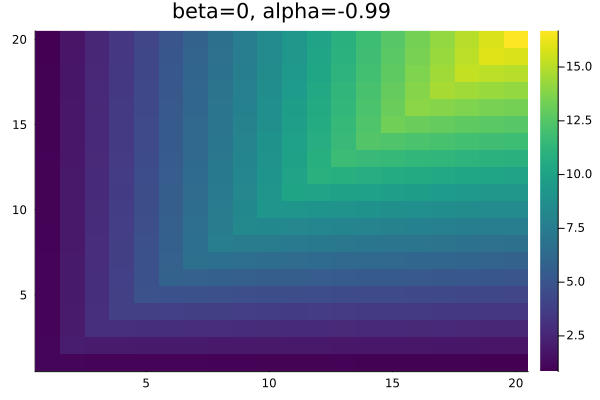

In [97]:
xcorr_2 = zeros(N, N)
for i in 1:N
    for j in 1:N
        xcorr_2[i, j] = sum(dataset_2[:, i] .* dataset_2[:, j]) / M
    end
end
avg_2 = mean(dataset_2, dims=1)
outeravg_2 = avg_2' * avg_2

# Plotting the heatmap with color bar for the second dataset
heatmap(xcorr_2 .- outeravg_2, title="beta=$(β_2), alpha=$(α_2)", color=:viridis, colorbar=true)
#savefig("betaminus08.png")

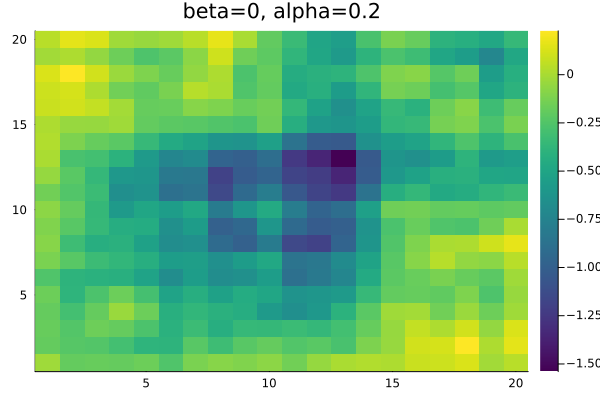

In [19]:
heatmap((xcorr_1 .- outeravg_1) - (xcorr_2 .- outeravg_2), title="beta=$(β_2), alpha=$(α_2)", color=:viridis, colorbar=true)

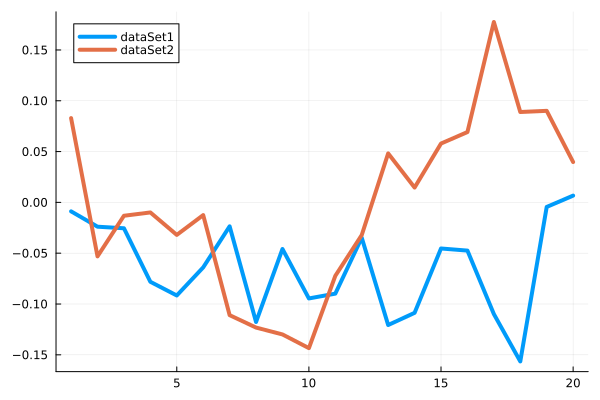

In [29]:
plot(vec(mean(dataSet1, dims = 1)), lw = 4, label = "dataSet1")
plot!(vec(mean(dataSet2, dims = 1)), lw = 4, label = "dataSet2")

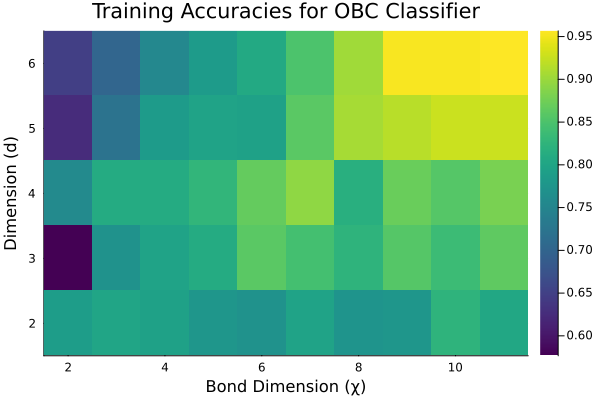

In [166]:
using DelimitedFiles
using Plots
using Plots.Measures

train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_train_acc_OBC_vary_chi_and_d_pm08_alpha08", ',')
test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_test_acc_OBC_vary_chi_and_d_pm08_alpha08", ',')
train_loss_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_train_loss_OBC_vary_chi_and_d_pm08_alpha08", ',')
test_loss_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_test_loss_OBC_vary_chi_and_d_pm08_alpha08", ',')
train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_train_acc_PBC_vary_chi_and_d_pm08_alpha08", ',')
test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_test_acc_PBC_vary_chi_and_d_pm08_alpha08", ',')
train_loss_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_train_loss_PBC_vary_chi_and_d_pm08_alpha08", ',')
test_loss_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_test_loss_PBC_vary_chi_and_d_pm08_alpha08", ',')

# train_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_train_acc_OBC_vary_chi_and_d_b109_b101_alpha08", ',')
# test_accs_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_test_acc_OBC_vary_chi_and_d_b109_b101_alpha08", ',')
# train_loss_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_train_loss_OBC_vary_chi_and_d_b109_b101_alpha08", ',')
# test_loss_OBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_test_loss_OBC_vary_chi_and_d_b109_b101_alpha08", ',')
# train_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_train_acc_PBC_vary_chi_and_d_b109_b101_alpha08", ',')
# test_accs_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_test_acc_PBC_vary_chi_and_d_b109_b101_alpha08", ',')
# train_loss_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_train_loss_PBC_vary_chi_and_d_b109_b101_alpha08", ',')
# test_loss_PBC = readdlm("/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/sahand_test_loss_PBC_vary_chi_and_d_b109_b101_alpha08", ',')

d_values = 2:6
chi_values = 2:11

heatmap(chi_values, d_values, train_accs_PBC,
        title = "Training Accuracies for OBC Classifier",
        xlabel = "Bond Dimension (χ)",
        ylabel = "Dimension (d)",
        color = :viridis,  # Color scheme
        colorbar = true)

# Define a custom layout
# layout = @layout [
#   a{0.5w} b{0.5w}
#   c{0.33w} d{0.33w} e{0.33w}
# ]

# # Create plots
# plots = []
# for i in 1:length(d_values)
#     p = plot(chi_values, test_accs_OBC[i, :], label="OBC", title="d = $(d_values[i])",
#              xlabel="Bond Dimension \$(\\chi_{max})\$", ylabel="Accuracy", color=:blue, lw = 4)
#     plot!(p, chi_values, test_accs_PBC[i, :], label="PBC", color=:red, lw = 4)
#     push!(plots, p)
# end

# # Create the combined plot with the specified layout
# final_plot = plot(plots..., layout = layout, size = (900, 600), legend = true, left_margin = 4mm, plot_title="Testing Accuracies, \$\\alpha=0.8\$, \$\\beta_{1}=0.9\$, \$\\beta_{2}=0.1\$")
# display(final_plot)

# savefig("sahand_vary_chi_vary_d_b109_b201_alpha08_five_plots_testing_acc.png")

In [184]:
r1 = 5
r2 = 10
t = 1
n = 12

function calc_prob(spike_prob)
    P_12 = (exp(-r1*t)*r1^n / factorial(n))*(1-spike_prob) + (exp(-r2*t)*r2^n / factorial(n))*(spike_prob)
    P_spike_given_12 = ((exp(-r2*t)*r2^n / factorial(n)) * (spike_prob)) / P_12
    return P_spike_given_12
end

vals = 0:0.01:1
probs = []
for val = vals
    push!(probs, calc_prob(val))
end

plot(vals, probs, lw = 4, label = "", dpi = 700)
xlabel!("P(spike)", fontsize = 16)
ylabel!("P(n=12|spike)", fontsize = 16)
title!("P(n=12|spike) as a Function of P(spike)", titlefontsize = 16)
savefig("bayesian_poisson_figure.png")

"/Users/angusrutherford/Desktop/Honours/Project/Code/QuantumInspiredML/bayesian_poisson_figure.png"